## Random Forest (Bosques Aleatorios)

Uno de los problemas con la creación de un árbol de decisión es que si la profundidad es suficiente, el árbol tiende a "memorizar" las soluciones en vez de generalizar el aprendizaje. Es decir, **tendremos un modelo sobreajustado (overfitting)**.


**La solución para evitar esto es crear muchos árboles y que trabajen en conjunto.**


**Random Forest es un modelo de aprendizaje supervisado** que, como su nombre lo indica, **consiste en una gran cantidad de árboles de decisión (Decision Trees) individuales que operan como un conjunto**. Cada árbol individual en el bosque aleatorio retorna una predicción de clase y la clase con más votos (moda) se convierte en la predicción de nuestro modelo.

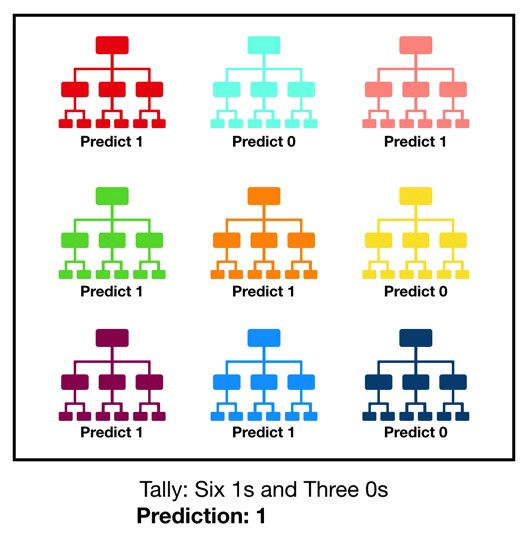


**¿Por qué se llama Random?**
- Cuenta con una **"doble aleatoriedad"**:
    - La primera es para la selección del **valor de "k" (número de atributos) para cada árbol**.
    - La segunda es para elegir la **cantidad de patrones (elementos) a utilizar para entrenar** a cada árbol del "bosque".


La razón por la que el modelo de **Random Forest** funciona muy bien es:
Una gran cantidad de modelos **relativamente no correlacionados** (árboles) que funcionan como un grupo superará a cualquiera de los modelos constituyentes individuales.

La **baja correlación** entre modelos es la clave, los modelos no correlacionados pueden producir predicciones en conjunto que son más precisas que cualquiera de las predicciones individuales.

La razón de este efecto es que los árboles se "protegen" entre sí de sus errores individuales (siempre y cuando no se equivoquen constantemente en la misma dirección).

Si bien algunos árboles pueden retornar predicciones erróneas, muchos otros árboles retornaran predicciones correctas, por lo que, como grupo, los árboles pueden retornar predicciones "mas acertadas".

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html_

In [24]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==2.0.2
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1


In [26]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Train, Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4),  y_test: (45,)


### Modelo

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Predicciones

In [30]:
yhat = model.predict(X_test)

yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [31]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [32]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

### Classification Report

In [33]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



### Atributos y Métodos

In [34]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.  , 0.99, 0.01],
       [0.98, 0.02, 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 0.98, 0.02],
       [0.  , 0.9 , 0.1 ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.89, 0.11],
       [0.  , 1.  , 0.  ],
       [0.  , 0.07, 0.93],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.1 ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.09, 0.91],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.06, 0.94],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [0.01, 0.97, 0.02],
 

In [35]:
# .feature_importances_ es un atributo que retorna un array con las importancias de cada columna
# En este caso como entrenamos con 4 columnas tenemos un array de 4 elementos.

model.feature_importances_

array([0.08575018, 0.03889161, 0.40682054, 0.46853768])

In [36]:
# Bucle "columna" vs "importancia"

for col, imp in zip(iris.feature_names, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: sepal length (cm) Importancia: 0.08575017888718951
Columna: sepal width (cm) Importancia: 0.03889160554386118
Columna: petal length (cm) Importancia: 0.40682053920529354
Columna: petal width (cm) Importancia: 0.46853767636365584


In [37]:
# Parametros del Modelo, definidos por defecto

print(f"n_estimators: {model.n_estimators}")
print(f"criterion: {model.criterion}")
print(f"max_depth: {model.max_depth}")
print(f"min_samples_split: {model.min_samples_split}")
print(f"min_samples_leaf: {model.min_samples_leaf}")
print(f"min_weight_fraction_leaf: {model.min_weight_fraction_leaf}")
print(f"max_features: {model.max_features}")
print(f"bootstrap: {model.bootstrap}")
print(f"random_state: {model.random_state}")
print(f"max_leaf_nodes: {model.max_leaf_nodes}")
print(f"min_impurity_decrease: {model.min_impurity_decrease}")
print(f"class_weight: {model.class_weight}")
print(f"ccp_alpha: {model.ccp_alpha}")

# Tiene los mismos que DecisionTreeClassifier, a excepción del parametro "splitter"

n_estimators: 100
criterion: gini
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
min_weight_fraction_leaf: 0.0
max_features: sqrt
bootstrap: True
random_state: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
class_weight: None
ccp_alpha: 0.0


In [38]:
# .get_params() retorna un diccionario con los parametros del modelo

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
model.estimators_[0].feature_importances_

array([0.15726851, 0.02067183, 0.28222636, 0.5398333 ])

In [40]:
model.estimators_[0].get_depth()

6

In [41]:
model.estimators_[0].get_n_leaves()

np.int64(10)

Counter({5: 34, 6: 27, 4: 18, 7: 8, 3: 5, 9: 3, 8: 3, 2: 2})


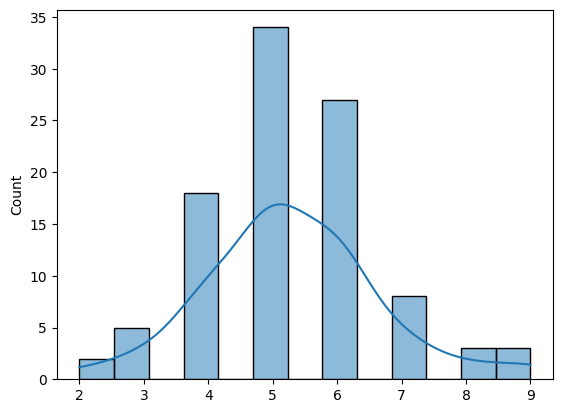

In [42]:
# Max depth
from collections import Counter

print(Counter([x.get_depth() for x in model.estimators_]))


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([x.get_depth() for x in model.estimators_], kde = True)
plt.show()

In [43]:
model.estimators_[0].get_n_leaves()

np.int64(10)

Counter({np.int64(7): 19, np.int64(8): 17, np.int64(9): 16, np.int64(10): 11, np.int64(11): 9, np.int64(6): 9, np.int64(5): 6, np.int64(12): 4, np.int64(4): 3, np.int64(3): 2, np.int64(13): 2, np.int64(15): 1, np.int64(14): 1})


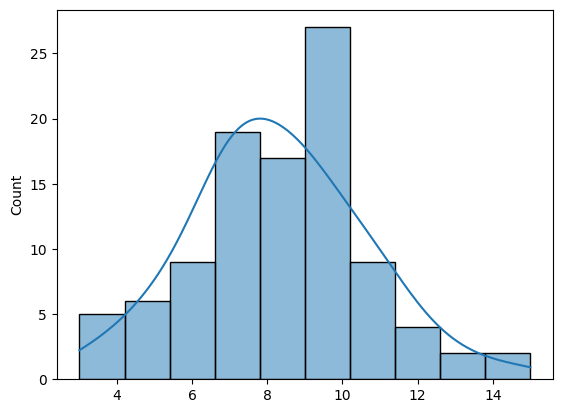

In [44]:
# N Leaves
from collections import Counter

print(Counter([x.get_n_leaves() for x in model.estimators_]))


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([x.get_n_leaves() for x in model.estimators_], kde = True)
plt.show()

In [45]:
print(f"Estimador Base: {model.estimator_}")

print("*"*100)

for num, estimador in enumerate(model.estimators_):
    print(f"Estimador {num}: {estimador}")
    
print(f"Numero de estimadores: {len(model.estimators_)}")

Estimador Base: DecisionTreeClassifier()
****************************************************************************************************
Estimador 0: DecisionTreeClassifier(max_features='sqrt', random_state=1901955366)
Estimador 1: DecisionTreeClassifier(max_features='sqrt', random_state=716750707)
Estimador 2: DecisionTreeClassifier(max_features='sqrt', random_state=421841467)
Estimador 3: DecisionTreeClassifier(max_features='sqrt', random_state=1504683715)
Estimador 4: DecisionTreeClassifier(max_features='sqrt', random_state=733594860)
Estimador 5: DecisionTreeClassifier(max_features='sqrt', random_state=1237257072)
Estimador 6: DecisionTreeClassifier(max_features='sqrt', random_state=1229352163)
Estimador 7: DecisionTreeClassifier(max_features='sqrt', random_state=923821858)
Estimador 8: DecisionTreeClassifier(max_features='sqrt', random_state=246511143)
Estimador 9: DecisionTreeClassifier(max_features='sqrt', random_state=1633963365)
Estimador 10: DecisionTreeClassifier(max_fe

### Parámetros del Modelo (Tuning)

#### Parametros de RandomForestClassifier()

- **`n_estimators`**: int, **`default`** = 100
    - Numero de arboles creados para generar el bosque.

___

- **`criterion`**: {"gini", "entropy"}, **default** = "gini"
    - Es la función para medir la calidad de una división/split. Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información.

___

- **`max_depth`**: int, **default** = None
    - La profundidad máxima del árbol. Si es **None** los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de **`min_samples_split`** elementos.
        
___

- **`min_samples_split`**: int or float, **default** = 2
    - El número mínimo de muestras requeridas para dividir un nodo interno.
    - Si es int, considera **`min_samples_split`** como el número mínimo.
    - Si es float, entonces **`min_samples_split`** es una fracción y **`ceil(min_samples_split * n_samples)`** es el número mínimo de muestras para cada división/split.
        
___

- **`min_samples_leaf`**: int or float, **`default`** = 1
    - El número mínimo de muestras requeridas para llegar a nodo hoja. Es un punto de división a cualquier profundidad del arbol  solo se considerará si deja al menos **`min_samples_leaf`** muestras de entrenamiento en cada una de las ramas izquierda y derecha.
    - Si es int, considera **`min_samples_leaf`** como el número mínimo.
    - Si es float, entonces **`min_samples_split`** es una fracción y **`ceil(min_samples_leaf * n_samples)`** es el número mínimo de muestras para cada nodo.
        
___

- **`min_weight_fraction_leaf`**: float, **`default`** = 0.0
    - La fracción ponderada mínima de la suma total de pesos (de todas las muestras de entrada) requerida para estar en un nodo hoja. Las muestras tienen el mismo peso cuando no se proporciona **`sample_weight`**.
            
___

- **`max_features`**: int, float or {"auto", "sqrt", "log2"}, **`default`** = None

    - El número de características (atributos) a considerar al buscar la mejor división:
    - Si es int, considera las funciones **`max_features`** en cada división.
    - Si es float, **`max_features`** es una fracción y se consideran **`int(max_features * n_features)`** características (atributos) en cada división.
    - Si es "auto", entonces **`max_features = sqrt(n_features)`**.
    - Si es "sqrt", entonces **`max_features = sqrt(n_features)`**.
    - Si es "log2", entonces **`max_features = log2(n_features)`**.
    - Si None, entonces **`max_features = n_features`**.
  
___

- **`random_state`**: int, **`default`** = None
    - Controla la aleatoriedad del estimador. Las características (atributos) siempre se permutan aleatoriamente en cada división, incluso si el divisor está configurado como "best".
    - Cuando **`max_features < n_features`**, el algoritmo seleccionará **`max_features`** al azar en cada división antes de encontrar la mejor división entre ellas. Pero la división mejor encontrada puede variar entre diferentes ejecuciones, incluso si **`max_features = n_features`**.
    - Ese es el caso, si la mejora del criterio es idéntica para varias divisiones y una división debe seleccionarse al azar.
    - Para obtener un comportamiento determinista durante el ajuste, **`random_state`** debe fijarse en un número entero.
  
___

- **`max_leaf_nodes`**: int, **`default`** = None
    - Este parámetro hace "crecer" el árbol ya que aumenta el número de nodos hoja.
    - Se define como "mejor nodo" como una reducción relativa de la impureza.
    - Si es None, entonces el modelo tendrá un número ilimitado de nodos hoja.
      
___

- **`min_impurity_decrease`**: float, **`default`** = 0.0
    - Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
         
___

- **`bootstrap`**: bool, **`default`** = True
    - Si se utiliza "bootstrap" al construir árboles.
    - Si es False, se usa todo el conjunto de datos para construir cada árbol.
         
___

- **`n_jobs`**: int, **`default`** = None
    - El número de "trabajos" a ejecutar en paralelo. **`fit`**, **`predict`**, **`decision_path`** y **`apply`** están paralelizados sobre los árboles.
    - None significa 1 procesador para trabajo en paralelo.
    - -1 significa usar todos los procesadores.
             
___


- **`class_weight`**: dict, list of dict or "balanced", **`default`** = None
    - Pesos asociados a cada clases en la forma **`{class_label : weight}`**.
    - Si es None, se supone que todas las clases tienen peso uno.
    - Para problemas de clasificación múltiple, se puede proporcionar una lista de diccionarios en el mismo orden que la columna y.
     
___

- **`ccp_alpha`**: non-negative float, **`default`** = 0.0
    - Parámetro de complejidad utilizado para **Minimal Cost-Complexity Pruning**.
    - Se elegirá el subárbol con la mayor complejidad de costos que sea menor que **`ccp_alpha`**. De forma predeterminada, no se realiza ninguna poda.

In [46]:
# Dataset del titanic preprocesado en clase

titanic = pd.read_csv("../Data/titanic_preprocesamiento.csv")

X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (613, 11), y_train: (613,)
X_test: (263, 11),  y_test: (263,)


In [47]:
# Prueba con RandomForestClassifier() con parámetros por defecto

model = RandomForestClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones
yhat = model.predict(X_test)

# Métricas
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:"      , roc_auc_score(y_test, yhat))

Jaccard Index: 0.6981047738244234
Accuracy: 0.8326996197718631
Precisión: 0.8190166975881261
Sensibilidad: 0.8217627245508983
F1-score: 0.8203328779033661
ROC AUC: 0.8217627245508983


In [48]:
# Prueba con RandomForestClassifier() usando diferentes parámetros

model = RandomForestClassifier(n_estimators      = 200,
                               criterion         = "gini",
                               max_depth         = 5,
                               #min_samples_split = 10,
                               min_samples_leaf  = 5,
                               max_features      = "sqrt",
                               #random_state      = 42, 
                               #max_leaf_nodes    = 40
                              )

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones
yhat = model.predict(X_test)

# Métricas
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
print("ROC AUC:"      , roc_auc_score(y_test, yhat))

Jaccard Index: 0.6941123188405798
Accuracy: 0.8326996197718631
Precisión: 0.8221901091843289
Sensibilidad: 0.8129054391217565
F1-score: 0.8170145477545857
ROC AUC: 0.8129054391217565


**Ventajas:**
- Es capaz de dar buenos resultados sin ajuste de parámetros.
- Al utilizar múltiples árboles se reduce considerablemente el riesgo de overfitting.
- Se mantiene estable con nuevas muestras puesto que al utilizar cientos de árboles sigue prevaleciendo la moda de sus votaciones.


**Deventajas:**
- En algunos casos el clasificador Random Forest también puede caer en overfitting.
- Es mucho más "costo" de crear y ejecutar que un solo DecisionTree.
- Puede requerir mucho tiempo de entrenamiento
- Random Forest no funciona bien con datasets pequeños.
- Es muy difícil poder interpretar los cientos de árboles creados en el bosque, si quisiéramos comprender y explicar su comportamiento.

In [49]:
################################################################################################################################